In [15]:
import numpy as np
import pandas as pd
from keras.datasets import mnist
#from keras.utils import np_utils
import matplotlib.pyplot as plt
import random


In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [13]:
print('Training shape:{}'.format(np.shape(X_train)))
print('Testing shape:{}'.format(np.shape(X_test)))

Training shape:(60000, 28, 28)
Testing shape:(10000, 28, 28)


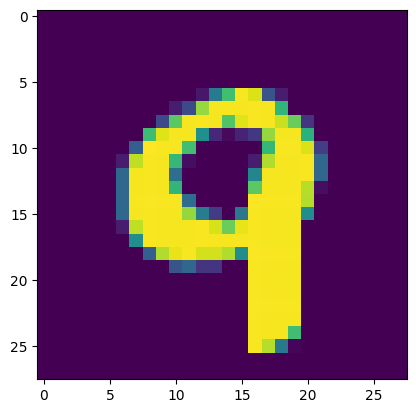

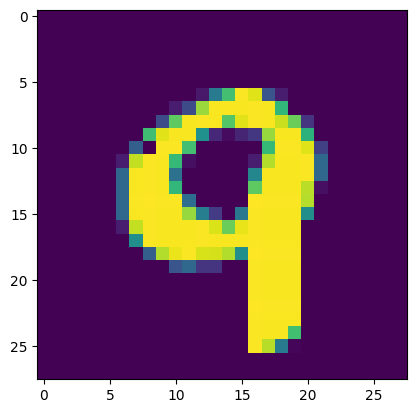

In [16]:
randTrainingNumbers =  random.sample(range(len(X_train)), 4)

fig, ax = plt.subplots(2,2, figsize=(10,10))


for ax, idx in zip(axes, randTrainingNumbers):
    ax.imshow(X_train[idx])
    ax.axis("off")

plt.tight_layout()
plt.show()
